# データサイエンス基礎：第7回

前回でデータの概要がわかりました。

さらに記述統計について学んでいきましょう。

## 復習：データの読みこみ

### データのダウンロード・解凍

**前回休んでいた、もしくは何らかの原因でデータが消えたりした場合**、以下の手順でファイルをダウンロード・解凍しましょう．

1. 上記URLまたはmoodleからZIPファイルをダウンロード
2. jupyter notebookに ZIPファイルをアップロード．<br>**このファイルと同じフォルダにアップロードしてください．**
3. 以下のプログラムを実行して，ZIPファイルが入っているフォルダを確認して`student-mat.csv`や`student-por.csv`が増えていれば成功です


In [ ]:
import zipfile

filename = './student.zip' # ファイルパスを定義
z = zipfile.ZipFile(filename) # パスのzipファイルを読み込む
z.extractall() # 読み込んだファイルを解凍
print('解凍完了')

### データの読み込み

以下のコードを実行すれば、このシート内にデータが読み込めます。

**もしシートを再読み込みした場合は、もう一度このセルを実行する必要があるので注意してください。**

In [2]:
import pandas as pd

# 読み込み
student_data_math = pd.read_csv('./student/student-mat.csv', sep=';')

# 5行表示
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## ヒストグラム

データの中の欠席数（`absences`）について考えてみることにします。

`head()`でサンプルを確認してみましょう。

In [4]:
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

それぞれの値がいったいどれくらいあるのか観測するのが、**ヒストグラム**です。

Matplotlibの基礎で学んだMatplotlibを使って、histでグラフを表示させます。

Matplotlib is building the font cache; this may take a moment.


(array([287.,  72.,  25.,   5.,   1.,   2.,   0.,   2.,   0.,   1.]),
 array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. , 52.5, 60. , 67.5, 75. ]),
 <BarContainer object of 10 artists>)

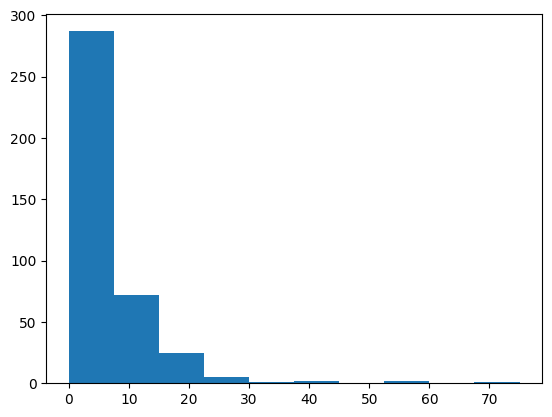

In [6]:
import matplotlib.pyplot as plt

# ヒストグラム、データの指定
plt.hist(student_data_math['absences'])

x軸とy軸に名前をつけたり、グリッドをつけたりしてさらにグラフを見やすくします。

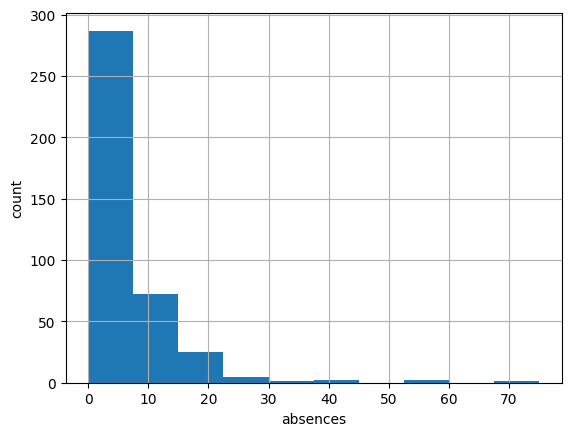

In [7]:
import matplotlib.pyplot as plt

# ヒストグラム、データの指定
plt.hist(student_data_math['absences'])

# x軸, y軸それぞれのラベル
plt.xlabel('absences')
plt.ylabel('count')

# グリッドをつける
plt.grid(True)

ヒストグラムを観察すると、０から10までの付近にデータが集中しているのがわかります。

一方、70以上の大きな数字もあります。

このような分布の裾が緩やかに減少しているような分布を、**ロングテールな分布**と呼びます。

## 平均・中央値・最頻値

ヒストグラムは、**データの全体像を見る上で欠かせないもの**です。

しかし、どのような時にデータが偏っているといえるのかなどの情報は読み取れず、客観性が少し乏しくなります。

そこで要約統計量（中央値、平均、標準偏差など）を用いて、**データの傾向を数値化し、より客観的にデータを表現**することができます。

In [8]:
# 平均値
print('平均値', student_data_math['absences'].mean())

# 中央値
print('中央値', student_data_math['absences'].median())

# 最頻値
print('最頻値', student_data_math['absences'].mode())

平均値 5.708860759493671
中央値 4.0
最頻値 0    0
Name: absences, dtype: int64


なお、平均値 $\bar{x}$ の計算式は以下の通りです。

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i \tag{1}
$$

## 分散・標準偏差

### 分散

データが散らばっているのか、それともまとまっている（平均付近に固まっているのか）を調べるのが**分散**です。

分散の計算式は以下で、$V$または$\sigma^2$で表すのが一般的です。

$$
\sigma^2=\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2 \tag{2}
$$

該当の変数を指定した後に、var()で計算できます。

In [9]:
student_data_math['absences'].var(ddof=0)

np.float64(63.887389841371565)

varはデフォルトで$n-1$で割る方式の不偏分散を計算します。

今回は$n$で割る方式で算出するために、オプションとして`ddof=0`を指定しています

### 標準偏差

標準偏差は分散の平方根です。

数式は以下のようになります。標準偏差は$\sigma$で表すことが一般的です。

$$
\sigma=\sqrt{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2} \tag{2}
$$

分散では、実際のデータのばらつきがどの程度かわかりません。

なぜなら、上記で提示した分散の定義式を見るとわかるように、計算で二乗しているからです。

標準偏差にすると単位の次元が実際のデータと同じなので、以下の結果からプラマイ８程度のばらつきがあることがわかります。

In [ ]:
student_data_math['absences'].std(ddof=0)

なお平方根は`np.sqrt`でも計算できるので、以下の方法で計算しても同じです。

In [ ]:
import numpy as np

np.sqrt(student_data_math['absences'].var(ddof=0))

## 要約統計量とパーセンタイル値

これまで、1つ1つの統計量を見てきましたが、Pandasで読み込んだDataFrameのdescribeメソッドを実行すると、これまで求めてきた統計量をまとめて確認できます。

In [ ]:
student_data_math['absences'].describe()

describeで計算できるものは以下です。
- データ数
- 平均
- 標準偏差
- 最小値
- 25, 50, 70パーセンタイル値
- 最大値

パーセンタイル値とは、全体を100として小さい方から数えて何番目になるのかを示す値です。

例えば、10パーセンタイルは100個のデータのうち小さい方から数えて10番目です。

50パーセンタイル値は中央値です。

### 四分位範囲を求める

describeの結果は`describe()[インデックス番号]`として取得できます。

例えば，平均値を示すmeanの値は`describe()[1]`で，標準偏差を示すstdの値は`describe()[2]`です。

```markdown
count    395.000000　　← describe()[0]
mean       5.708861　　← describe()[1]
std        8.003096　　← describe()[2]
min        0.000000　　← describe()[3]
25%        0.000000　　← describe()[4]
50%        4.000000　　← describe()[5]
75%        8.000000　　← describe()[6]
max       75.000000　　← describe()[7]
```

それぞれの要素を参照すれば、その値を使った計算ができます。

さて、以下の計算は何を求めていますか？

In [ ]:
student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]

### 全列を対象とした結果を求める

describeメソッドで列名や要素を指定せずに実行すると、すべての量的データの要約統計量を求めることができます。

まとめて計算する場合は便利です。

In [ ]:
student_data_math.describe()

## 箱ひげ図

箱ひげ図を書くには、`plt.boxplot`を使います。

In [ ]:
import matplotlib.pyplot as plt

# 箱ひげ図：G1
plt.boxplot(student_data_math['G1'])
plt.grid(True)

In [ ]:
# 箱ひげ図：欠席数
plt.boxplot(student_data_math['absences'])
plt.grid(True)

複数の箱ひげ図を同時に出すこともできます。

In [ ]:
# 箱ひげ図： G1, G2, G3

plt.boxplot([student_data_math['G1'],student_data_math['G2'], student_data_math['G3']] )
plt.grid(True)

### 演習

前回の課題で自分でつかった変数について、箱ひげ図を表示してみましょう。そこから何かわかることはありませんか？

## 変動係数

分散や標準偏差について見てきましたが、異なるデータの同士について、これらは単純比較できません。

例えば
- 数学のテストの点数(100点満点)の標準偏差
- TOEICの点数(990点満点)の標準偏差

を比べるのはナンセンスです。

なぜなら満点が大きい方が、それぞれの差も大きくなるので、標準偏差（分散）も大きくなりやすいからです。

そこで登場するのが変動係数で、これを使うとスケールに依存せず、比較ができるようになります。

変数は$CV$で表すことが一般的です。

$$
CV=\frac{\sigma}{\bar{x}} \tag{3}
$$

In [12]:
student_data_math.std(ddof=0, numeric_only=True) / student_data_math.mean(numeric_only=True) 

age           0.076330
Medu          0.397673
Fedu          0.431019
traveltime    0.481058
studytime     0.411791
failures      2.222501
famrel        0.227042
freetime      0.308334
goout         0.357645
Dalc          0.600679
Walc          0.561409
health        0.390651
absences      1.400097
G1            0.303881
G2            0.350641
G3            0.439324
dtype: float64

## 散布図と相関係数

これまでは基本的に1変数のみに着目し、グラフや要約統計量を出してきました。

次に変数間の関係性を見ていくために、**散布図**と**相関係数**について学びましょう。

例えば、

**仮説：「1学期の成績(G1)が大きい人ほど、最終学期の成績(G3)の成績もいい」**

について調べるには変数間の関係を調べる必要があります。（ちなみに、この仮説は正しいと思いますか？）

調べるためには、**散布図**を使いましょう。

**ここは課題を出す上で特に重要なので、一緒にプログラムを書いていきましょう。**

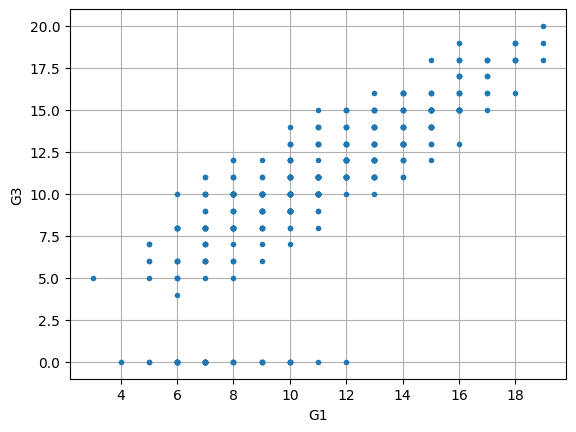

In [6]:
import matplotlib.pyplot as plt

plt.plot(student_data_math['G1'], student_data_math['G3'], '.')
plt.grid(True)
plt.xlabel('G1')
plt.ylabel('G3')
plt.show()



### 共分散

次に二つの変数の関係について数値化してみることを考えてみましょう。

2つの変数の関係性を見るための指標として、**共分散**があります。定義は以下の通りです。

$$
S_{xy} = \frac{1}{n}\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})  \tag{4}
$$

数式を見てもよくわからないですね。今回はこれだけ覚えてください。

- **共分散が大きい（正）** → $X$ が大きいとき $Y$ も大きい傾向がある

- **共分散が $0$ に近い** → $X$ と $Y$ にあまり関係はない

- **共分散が小さい（負）** → $X$ が大きいとき $Y$ は小さい傾向がある


数式の詳しい説明は4年生でやるはずです。

Numpyには共分散の行列（共分散行列）を求める機能があります。

次のようにcov関数を使うと求められます。

以下では、G1とG3の共分散を求めています。

In [5]:
import numpy as np
np.cov(student_data_math['G1'], student_data_math['G3'])

array([[11.01705327, 12.18768232],
       [12.18768232, 20.9896164 ]])

結果の意味は、次のとおりです。

- G1とG3の共分散：共分散行列の(1, 2), (2, 1)の要素です（同じ値のところ）。上の例では12.187...となっています

- G1の分散：共分散行列の(1,1)の要素です。上の例では11.017...です。

- G2の分散：共分散行列の(2,2)の要素です。上の例では20.9896164です。

### 相関係数

共分散にも、分散・標準偏差と同じ問題があります。各変数の大きさや単位に依存するということです。

その影響を受けないように関係を数値化するのが**相関係数**です。

定義は以下の通りです。

$$
r_{xy} = \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y}) }{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2}\sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}
$$

わけわかんないと思うので、ここでは式は気にしないでください。ここで抑えてほしいのは以下です。

- 相関係数は$-1$から$1$までの値を取る
- $1$に近いほど、$X$が大きい時$Y$が大きい傾向がある（**正の相関がある**、という）
- $-1$に近いほど、$X$が大きい時$Y$が小さい傾向がある（**負の相関がある**、という）
- $0$に近い場合、二つの変数にあまり関係はない（**無相関である**、という）

Pythonでは、Numpyを使って相関行列というものを計算できます。

それぞれの変数すべての組み合わせで相関行列を算出しています。

In [4]:
import numpy as np

np.corrcoef([student_data_math['G1'],student_data_math['G3']])

array([[1.        , 0.80146793],
       [0.80146793, 1.        ]])

この時、右上と左下の値がG1とG3の相関係数を表しています。

$0.8$とかなり正の相関が高いことがわかりますね。

## 課題4

以下の課題のクリアするプログラムファイル（.ipynbファイル）を作成・提出してください。

### 統計量の算出

前回、今回でダウンロードしたデータにはもう一つの成績データ`student-por.scv`があります。

そのデータの欠席数`absences`の統計量を計算し、表示してください。

具体的に表示する値は以下です。

- データ数
- 平均
- 中央値
- 最頻値
- 分散
- 標準偏差
- 25, 50, 75パーセンタイル値
- 変動係数

これらの値が正しく表示され、表示された値が統計量と対応しているのかがわかる提出であれば満点とします。

※ ラベル付き表示、辞書・表形式、`print("平均:", value)` など、統計量と値の対応が明確であれば可。

### 箱ひげ図・散布図の作成

1. 整数型(int64)の何らかの変数を1つ選び、その変数の箱ひげ図を表示するプログラムを作成してください。
2. 整数型(int64)の何らかの変数を2つ選び、それらの散布図を表示するプログラムを作成してください

### 共分散, 相関係数の計算

1. 整数型(int64)の何らかの変数を2つ選び、それらの共分散行列．相関係数行列を表示するプログラムを作成してください

## 課題チェックリスト

### ① 提出形式・実行確認（10点）

- .ipynb（Jupyter Notebook）形式で提出している
- 上から順にセルを実行してエラーが出ない
- student-por.csv を正しく読み込めている

### ② 統計量の算出（45点）

- 表示する統計量（各項目が正しく計算・表示されている）
    - データ数
    - 平均
    - 中央値
    - 最頻値
    - 分散
    - 標準偏差
    - 25パーセンタイル値
    - 50パーセンタイル値
    - 75パーセンタイル値
    - 変動係数

### ③ 箱ひげ図・散布図（25点）
- 箱ひげ図（10点）
    - 整数型（int64）の変数を1つ選んでいる
    - 箱ひげ図を正しく表示している
    - グラフにタイトルや軸ラベルがある

- 散布図（15点）
    - 整数型（int64）の変数を2つ選んでいる
    - 散布図を正しく表示している
    - グラフにタイトルや軸ラベルがある

### ④ 共分散・相関係数（20点）
- 整数型（int64）の変数を2つ選んでいる
- 共分散行列を計算・表示している
- 相関係数行列を計算・表示している